# Toxic Comment Classification

## Packages Loading

In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
import zipfile

from wordcloud import WordCloud

import nltk
nltk.download('wordnet')


from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string


[nltk_data] Downloading package wordnet to /root/nltk_data...


## Data Preprocessing and Exploratory Data Analyasis

<a id='Data-loading'></a>
### 📥 Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
zip_file_path1 = '/content/drive/MyDrive/Files/TT-3_project/train.csv.zip'
zip_file_path_new1 = '/content/data/train.csv.zip'

zip_file_path2 = '/content/drive/MyDrive/Files/TT-3_project/test_labels.csv.zip'
zip_file_path_new2 = '/content/data/test_labels.csv.zip'

zip_file_path3 = '/content/drive/MyDrive/Files/TT-3_project/test.csv.zip'
zip_file_path_new3 = '/content/data/test.csv.zip'

zip_file_path4 = '/content/drive/MyDrive/Files/TT-3_project/sample_submission.csv.zip'
zip_file_path_new4 = '/content/data/sample_submission.csv.zip'

extracted_dir_path = '/content/train-csv_extracted/'


In [ ]:
#!cp fashion_mnist_model_VGG16.h5 /content/drive/My\ Drive/Files/hw16/

In [ ]:
!mkdir '/content/data/'

In [ ]:
!cp '/content/drive/MyDrive/Files/TT-3_project/train.csv.zip' '/content/data/'
!cp '/content/drive/MyDrive/Files/TT-3_project/test_labels.csv.zip' '/content/data/'
!cp '/content/drive/MyDrive/Files/TT-3_project/test.csv.zip' '/content/data/'
!cp '/content/drive/MyDrive/Files/TT-3_project/sample_submission.csv.zip' '/content/data/'

In [ ]:
import zipfile
# Extract the zip file
with zipfile.ZipFile(zip_file_path_new1, 'r') as zip_ref1:
    zip_ref1.extractall(extracted_dir_path)
with zipfile.ZipFile(zip_file_path_new2, 'r') as zip_ref2:
    zip_ref2.extractall(extracted_dir_path)
with zipfile.ZipFile(zip_file_path_new3, 'r') as zip_ref3:
    zip_ref3.extractall(extracted_dir_path)
with zipfile.ZipFile(zip_file_path_new4, 'r') as zip_ref4:
    zip_ref4.extractall(extracted_dir_path)


In [ ]:
train = pd.read_csv("train-csv_extracted/train.csv")
test = pd.read_csv("train-csv_extracted/test.csv")
test_y = pd.read_csv("train-csv_extracted/test_labels.csv")

### Data Analysis

In [ ]:
train.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [ ]:
train.describe()

toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       0.009996       0.052948       0.002996   
std         0.294379       0.099477       0.223931       0.054650   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [ ]:
train['toxic'].value_counts(normalize = True)

toxic
0    0.904156
1    0.095844
Name: proportion, dtype: float64

In [ ]:
test.head()

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [ ]:
test_y.head()

id  toxic  severe_toxic  obscene  threat  insult  \
0  00001cee341fdb12     -1            -1       -1      -1      -1   
1  0000247867823ef7     -1            -1       -1      -1      -1   
2  00013b17ad220c46     -1            -1       -1      -1      -1   
3  00017563c3f7919a     -1            -1       -1      -1      -1   
4  00017695ad8997eb     -1            -1       -1      -1      -1   

   identity_hate  
0             -1  
1             -1  
2             -1  
3             -1  
4             -1

In [ ]:
test_y.describe()

toxic   severe_toxic        obscene         threat  \
count  153164.000000  153164.000000  153164.000000  153164.000000   
mean       -0.542530      -0.579895      -0.558193      -0.580913   
std         0.572465       0.498408       0.542966       0.496195   
min        -1.000000      -1.000000      -1.000000      -1.000000   
25%        -1.000000      -1.000000      -1.000000      -1.000000   
50%        -1.000000      -1.000000      -1.000000      -1.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  153164.000000  153164.000000  
mean       -0.559916      -0.577642  
std         0.539594       0.503260  
min        -1.000000      -1.000000  
25%        -1.000000      -1.000000  
50%        -1.000000      -1.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [ ]:
test_y[test_y['toxic']==-1]

id  toxic  severe_toxic  obscene  threat  insult  \
0       00001cee341fdb12     -1            -1       -1      -1      -1   
1       0000247867823ef7     -1            -1       -1      -1      -1   
2       00013b17ad220c46     -1            -1       -1      -1      -1   
3       00017563c3f7919a     -1            -1       -1      -1      -1   
4       00017695ad8997eb     -1            -1       -1      -1      -1   
...                  ...    ...           ...      ...     ...     ...   
153159  fffcd0960ee309b5     -1            -1       -1      -1      -1   
153160  fffd7a9a6eb32c16     -1            -1       -1      -1      -1   
153161  fffda9e8d6fafa9e     -1            -1       -1      -1      -1   
153162  fffe8f1340a79fc2     -1            -1       -1      -1      -1   
153163  ffffce3fb183ee80     -1            -1       -1      -1      -1   

        identity_hate  
0                  -1  
1                  -1  
2                  -1  
3                  -1  
4                  -1  
...               ...  
153159             -1  
153160             -1  
153161             -1  
153162             -1  
153163             -1  

[89186 rows x 7 columns]

Що означає -1?

value of -1 indicates it was not used for scoring

При використанні test_y теж доведеться ігнорувати ці значення для обчислення Accuracy

Простіше за все зробити новий датафрейм без них

value of -1 indicates it was not used for scoring. Я так розумію, що ми можемо тренувати модель на всьому файлі, просто частина даних у ньому без підказок для моделі.

In [ ]:
test_y.toxic.unique()

array([-1,  0,  1])

In [ ]:
train.shape

(159571, 8)

In [ ]:
test.shape

(153164, 2)

Довжина коментарів.


<Axes: xlabel='comment_text', ylabel='Count'>

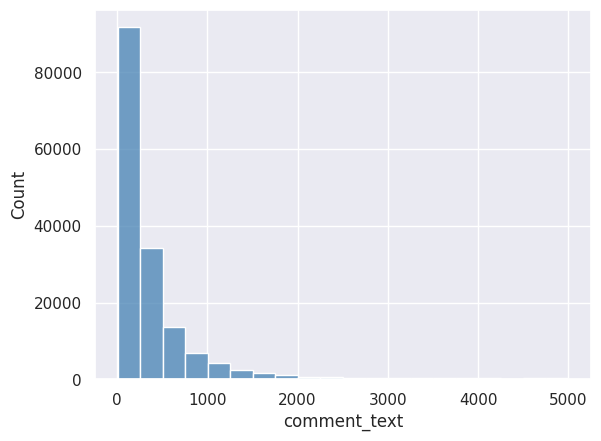

In [ ]:
sns.set(color_codes=True)
comment_len = train.comment_text.str.len()
sns.histplot(comment_len, kde=False, bins=20, color="steelblue")

Частота позначених коментарів. 'toxic' найчастіші.



In [ ]:
# Subsetting labels from the training data
train_labels = train[['toxic', 'severe_toxic',
                      'obscene', 'threat', 'insult', 'identity_hate']]
label_count = train_labels.sum()

<Axes: title={'center': 'Labels Frequency'}>

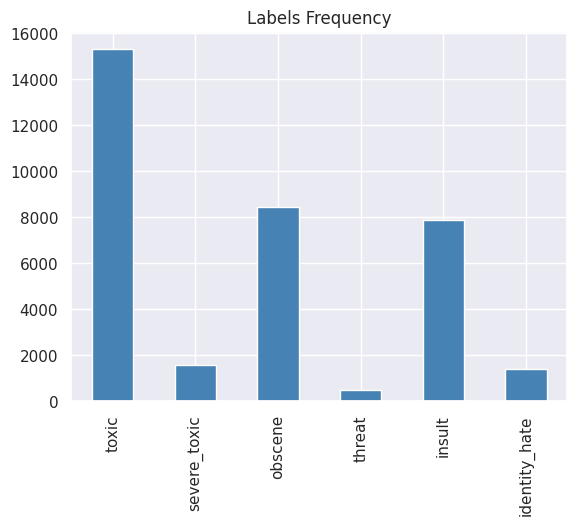

In [ ]:
label_count.plot(kind='bar', title='Labels Frequency', color='steelblue')

Деякі коментарі належать одночасно декільком класам.
Це вплине на спосіб визначення класу

In [ ]:
train[train["toxic"]==1]

id                                       comment_text  \
6       0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
12      0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
16      0007e25b2121310b  Bye! \n\nDon't look, come or think of comming ...   
42      001810bf8c45bf5f  You are gay or antisemmitian? \n\nArchangel WH...   
43      00190820581d90ce           FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!   
...                  ...                                                ...   
159494  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
159514  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
159541  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
159546  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
159554  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
6           1             1        1       0       1              0  
12          1             0        0       0       0              0  
16          1             0        0       0       0              0  
42          1             0        1       0       1              1  
43          1             0        1       0       1              0  
...       ...           ...      ...     ...     ...            ...  
159494      1             0        1       0       1              1  
159514      1             0        0       0       1              0  
159541      1             0        1       0       1              0  
159546      1             0        0       0       1              0  
159554      1             0        1       0       1              0  

[15294 rows x 8 columns]

Візуалізація частоти

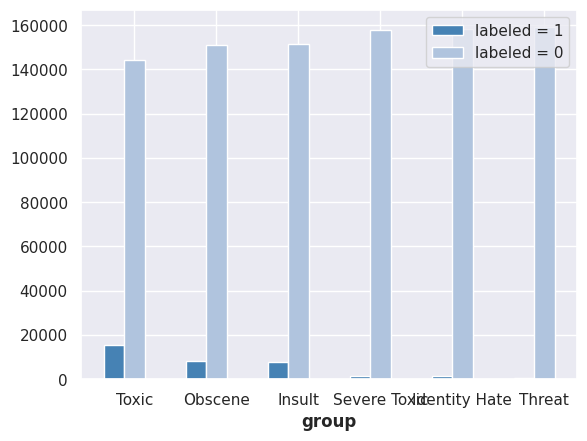

In [ ]:
# Code to draw bar graph for visualising distribution of classes within each label.
barWidth = 0.25

bars1 = [sum(train['toxic'] == 1), sum(train['obscene'] == 1), sum(train['insult'] == 1), sum(train['severe_toxic'] == 1),
         sum(train['identity_hate'] == 1), sum(train['threat'] == 1)]
bars2 = [sum(train['toxic'] == 0), sum(train['obscene'] == 0), sum(train['insult'] == 0), sum(train['severe_toxic'] == 0),
         sum(train['identity_hate'] == 0), sum(train['threat'] == 0)]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='steelblue', width=barWidth, label='labeled = 1')
plt.bar(r2, bars2, color='lightsteelblue', width=barWidth, label='labeled = 0')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate',
                                                       'Threat'])
plt.legend()
plt.show()

Приклад чистого коментаря

In [ ]:
# example of clean comment
print(train.comment_text[0])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


Токсичний коментар, приклад

In [ ]:
# example of toxic comment
print(train[train.toxic == 1].iloc[1, 1])

Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...


<Axes: >

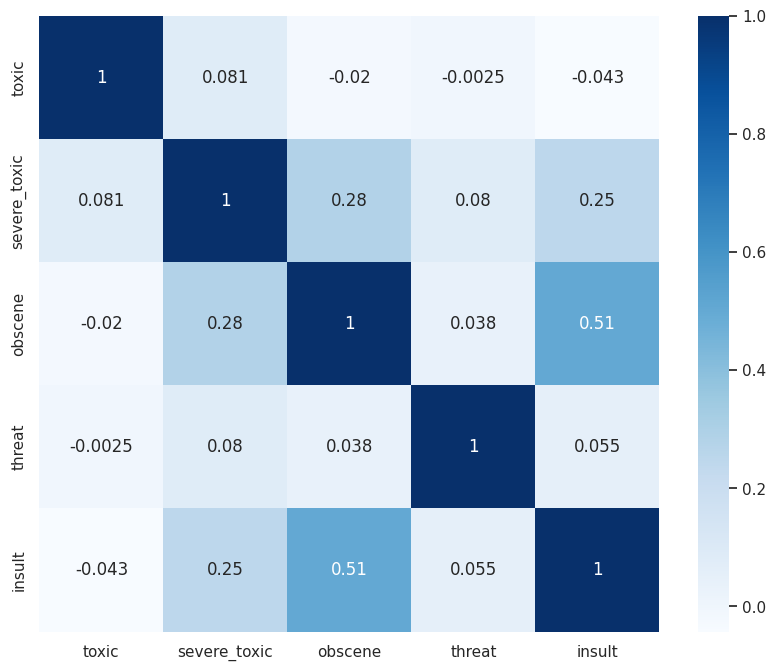

In [ ]:
# Cross correlation matrix across labels
rowsums = train.iloc[:, 2:].sum(axis=1)
temp = train.iloc[:, 2:-1]
train_corr = temp[rowsums > 0]
corr = train_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="Blues")

Маємо високу кореляцію між threat та insult та obscene.

Побудова графіку у вигляді хмари слів.

In [ ]:
from wordcloud import WordCloud
def W_Cloud(token):
    """
    Visualize the most common words contributing to the token.
    """
    threat_context = train[train[token] == 1]
    threat_text = threat_context.comment_text
    neg_text = pd.Series(threat_text).str.cat(sep=' ')
    wordcloud = WordCloud(width=1600, height=800,
                          max_font_size=200).generate(neg_text)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most common words assosiated with {token} comment", size=20)
    plt.show()

In [ ]:
# # Subsetting labels from the training data
# train_labels = train[['toxic', 'severe_toxic',
#                       'obscene', 'threat', 'insult', 'identity_hate']]

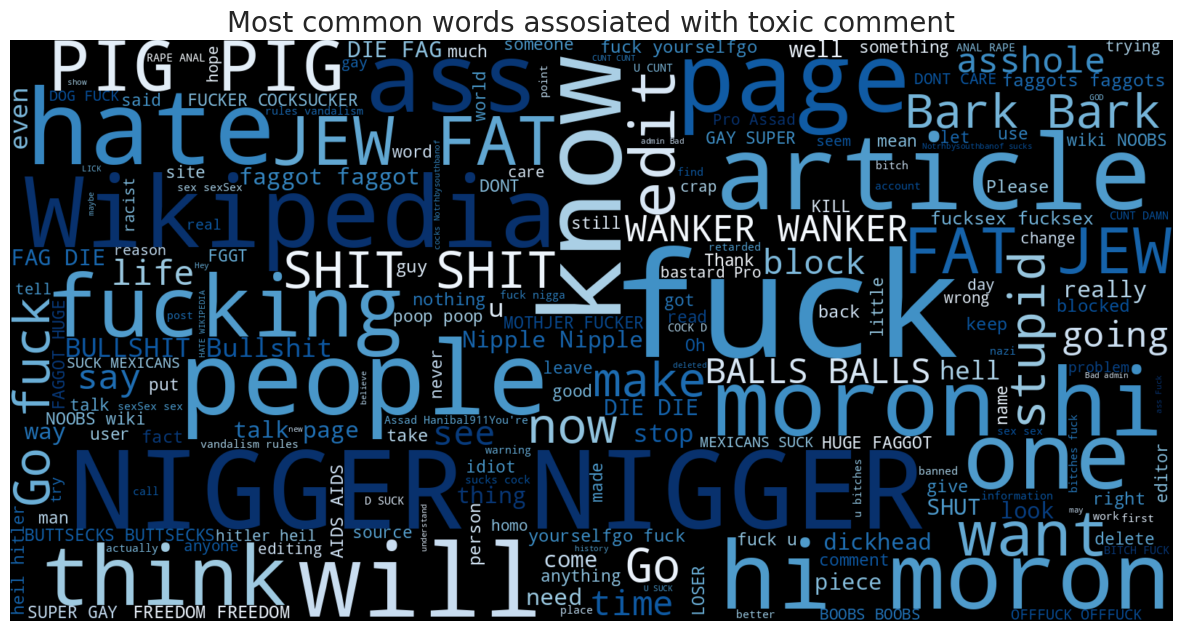

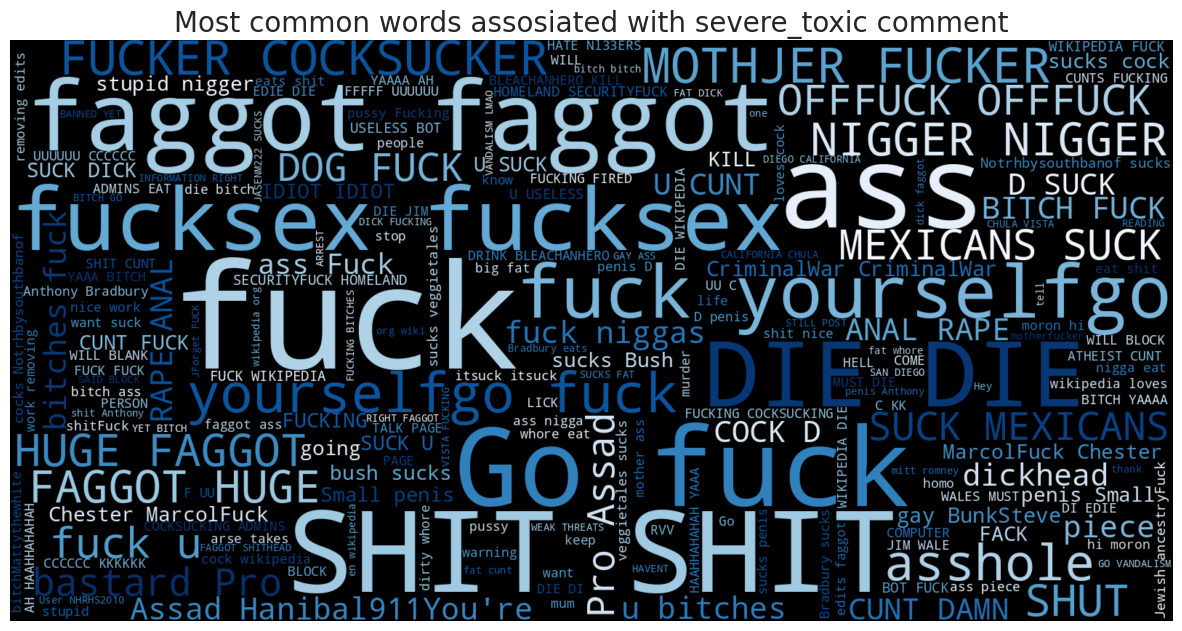

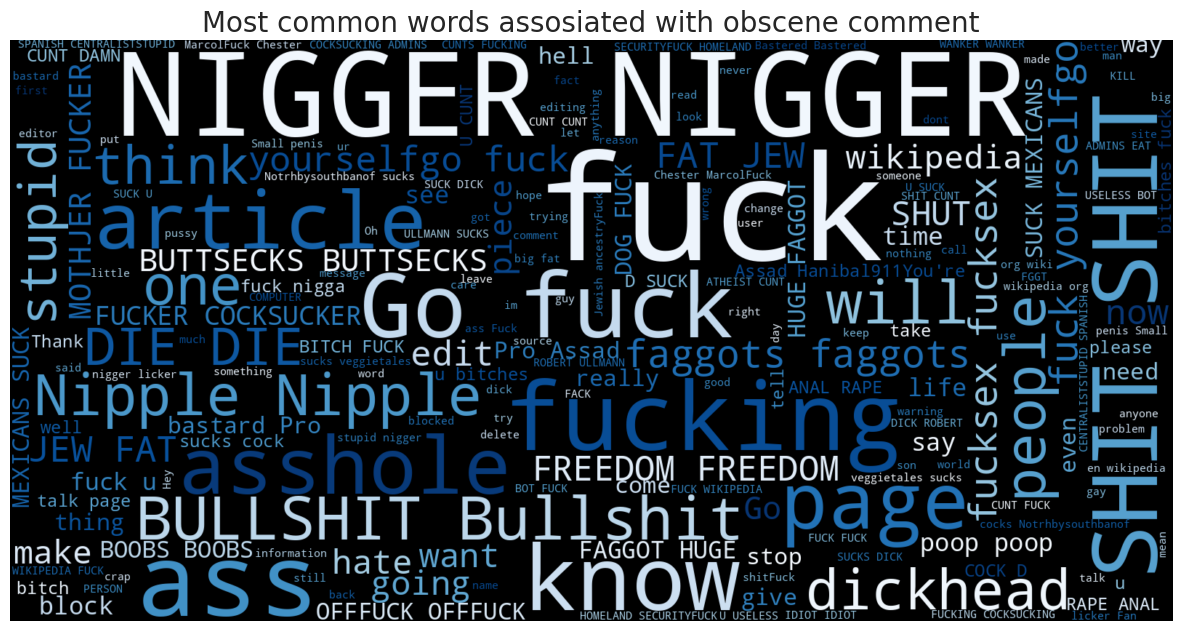

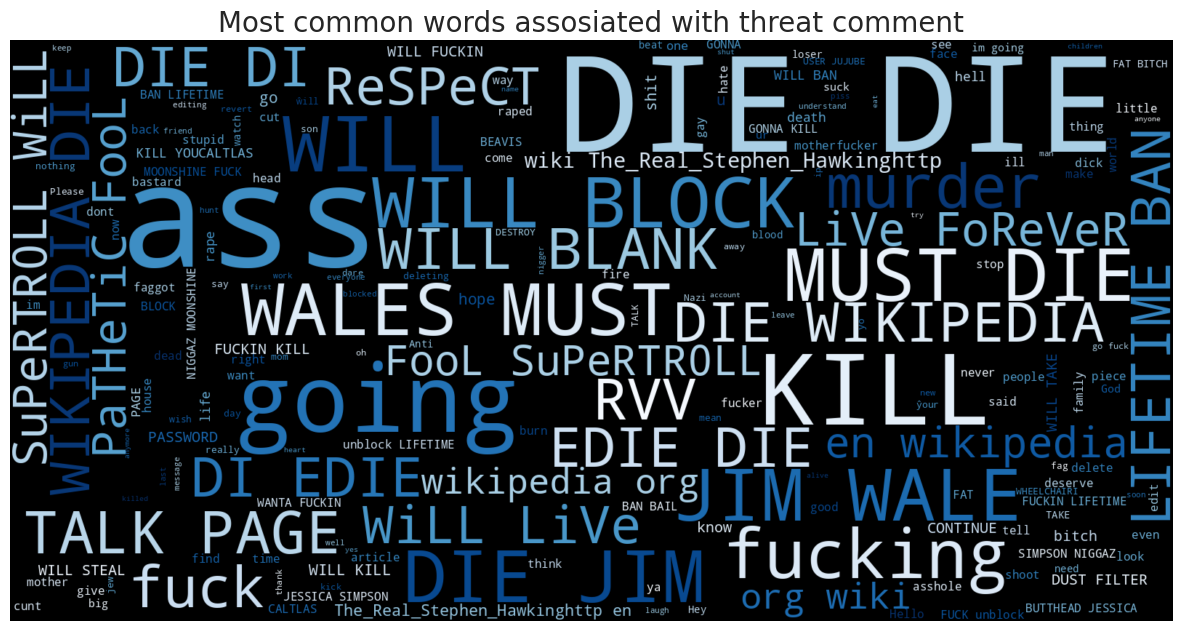

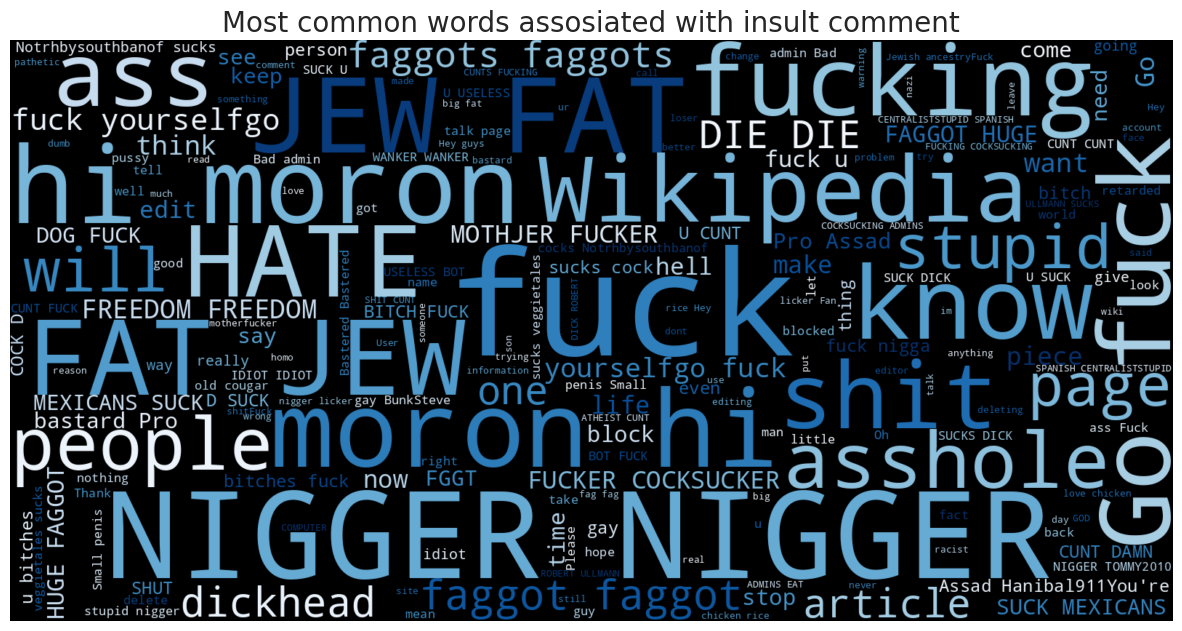

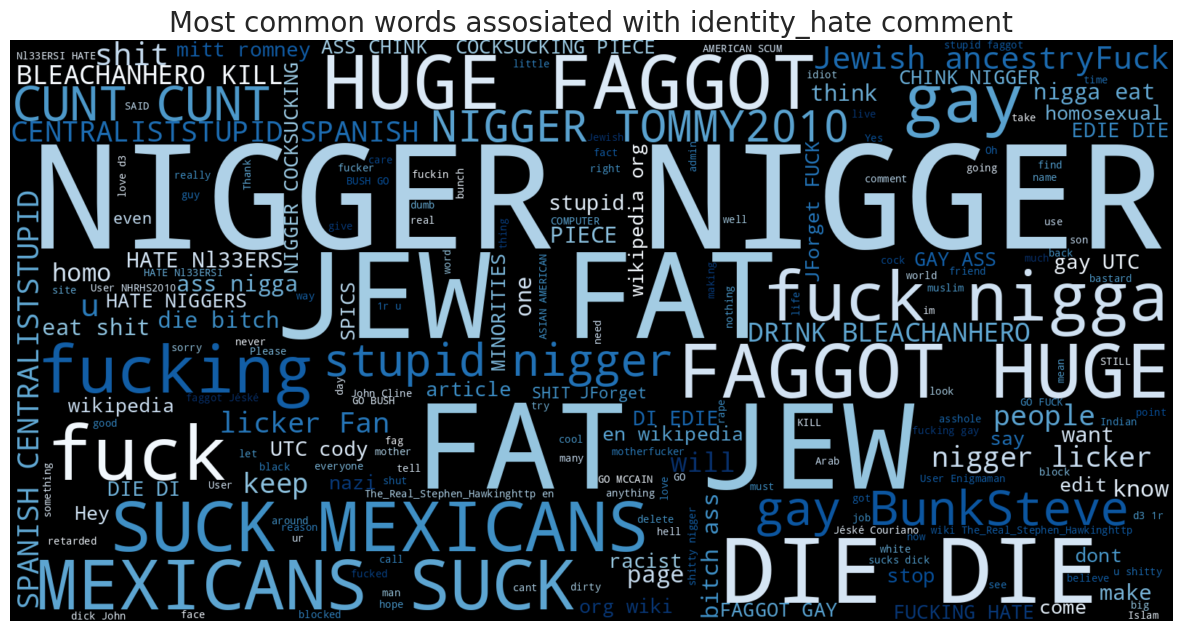

In [ ]:
# interactive visual : enter the label name.
# token = input(
#     'Choose a class to visualize the most common words contributing to the class:')
train_labels_words = ['toxic', 'severe_toxic',
                      'obscene', 'threat', 'insult', 'identity_hate']
for token in train_labels_words:
  # print(token.lower())
  W_Cloud(token.lower())

## Feature-engineering

In [ ]:
test_labels = ["toxic", "severe_toxic", "obscene",
               "threat", "insult", "identity_hate"]

In [ ]:
def tokenize(text):
    '''
    Tokenize text and return a non-unique list of tokenized words found in the text.
    Normalize to lowercase, strip punctuation, remove stop words, filter non-ascii characters.
    Lemmatize the words and lastly drop words of length < 3.
    '''
    text = text.lower()
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)
    words = nopunct.split(' ')
    # remove any non ascii
    words = [word.encode('ascii', 'ignore').decode('ascii') for word in words]
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(w) for w in words]
    words = [w for w in words if len(w) > 2]
    return words

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string

vector = TfidfVectorizer(ngram_range=(1, 1), analyzer='word',
                         tokenizer=tokenize, stop_words='english',
                         strip_accents='unicode', use_idf=1, min_df=10)
X_train = vector.fit_transform(train['comment_text'])
X_test = vector.transform(test['comment_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
vector.get_feature_names_out()[0:20]

array(['aaa', 'aap', 'aardvark', 'aaron', 'aba', 'abandon', 'abandoned',
       'abandoning', 'abandonment', 'abbas', 'abbey', 'abbott',
       'abbreviated', 'abbreviation', 'abc', 'abcnews', 'abd', 'abducted',
       'abduction', 'abdul'], dtype=object)

In [ ]:
df_test = pd.merge(test, test_y, on="id")

In [ ]:
df_test.head()

id                                       comment_text  toxic  \
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...     -1   
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...     -1   
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...     -1   
3  00017563c3f7919a  :If you have a look back at the source, the in...     -1   
4  00017695ad8997eb          I don't anonymously edit articles at all.     -1   

   severe_toxic  obscene  threat  insult  identity_hate  
0            -1       -1      -1      -1             -1  
1            -1       -1      -1      -1             -1  
2            -1       -1      -1      -1             -1  
3            -1       -1      -1      -1             -1  
4            -1       -1      -1      -1             -1

In [ ]:
df_test.shape

(153164, 8)

In [ ]:
test.head()

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [ ]:
# removing sample with labels equal to -1
df_test = test.loc[test['toxic'] >= 0]
df_test.reset_index(inplace=True)
df_test = df_test.drop(columns=['index'])

KeyError: 'toxic'

In [ ]:
df_test.head()

In [ ]:
df_test.shape